In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:

pip_path = '../data/PIP/2019_MQT/netCDF/'
mrr_path = '../data/MRR/'
met_path = '../data/MET/'


<xarray.Dataset>
Dimensions:     (time: 633332)
Dimensions without coordinates: time
Data variables: (12/37)
    Wind Samp   (time) float64 ...
    Solar Eng   (time) float64 ...
    In Humidty  (time) float64 ...
    Julian Day  (time) timedelta64[ns] ...
    Dew Point   (time) float64 ...
    THSW Index  (time) float64 ...
    ...          ...
    UV Dose     (time) float64 ...
    In Temp     (time) float64 ...
    Rain Rate   (time) float64 ...
    High UV     (time) float64 ...
    Time Local  (time) timedelta64[ns] ...
    Heat DDs    (time) float64 ...


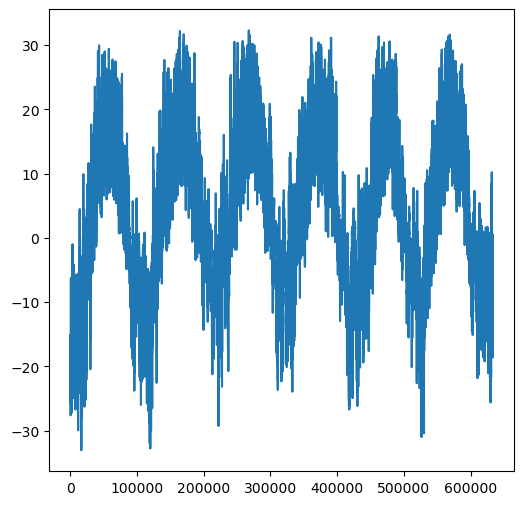

In [20]:
################# MET DATA

def plot_met(var):
    ds_met = xr.open_dataset(met_path + '2013-2020_MQT.nc')
#     print(ds_met)
    
    val = ds_met[var].values
    val[val<=-9999] = np.nan
    fig, ax = plt.subplots(figsize=(6,6))
    plt.plot(np.arange(len(val)), val)
    plt.show()
    
plot_met('Temp Out')


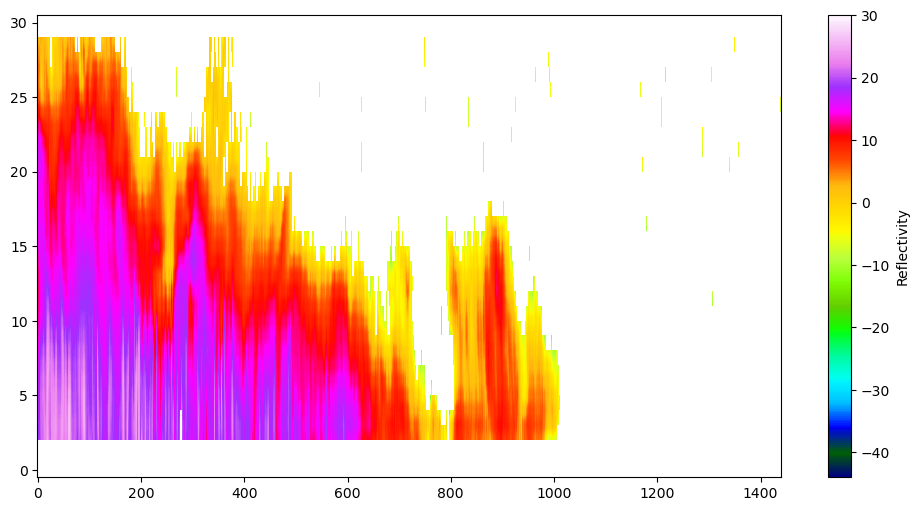

In [51]:
################# MRR DATA

def plot_mrr(var):
    ds_mrr = xr.open_dataset(mrr_path + 'MRR_NWS_MQT_20190213_snow.nc')
#     print(ds_mrr)
    
    val = ds_mrr[var].values
    fig, ax = plt.subplots(figsize=(12,6))
    h = plt.imshow(val.T, cmap='gist_ncar', vmin=-44, vmax=30, aspect='auto')
    cbar = fig.colorbar(h, ax=ax)
    cbar.set_label("Reflectivity")
    ax.invert_yaxis()
    plt.show()
    
plot_mrr('Ze')


/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


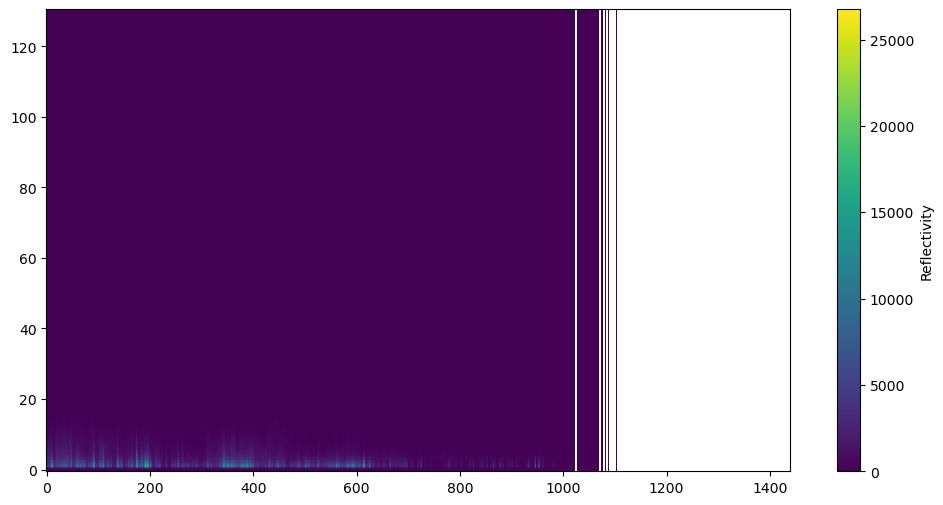

/Users/fraserking/miniforge3/envs/s03/lib/python3.10/site-packages/xarray/coding/variables.py:213: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


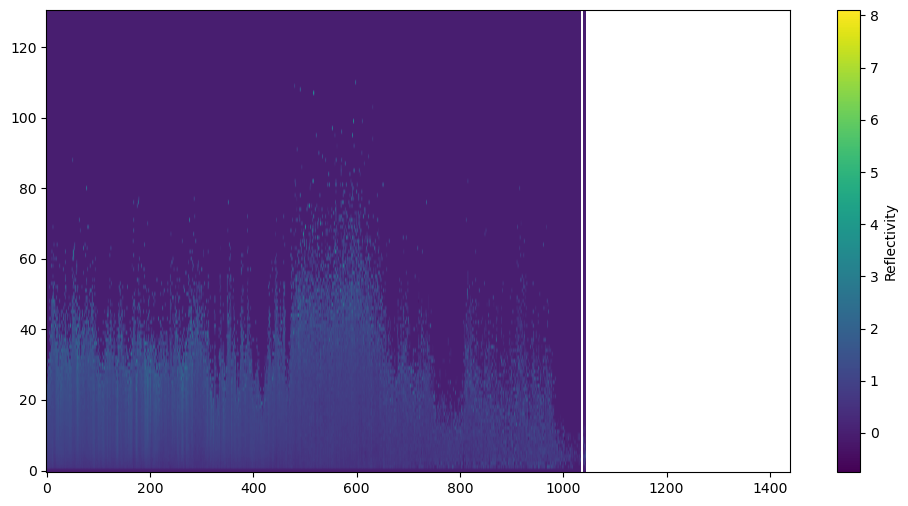

In [61]:
################# PIP DATA

def plot_pip(file, var):
    ds_pip = xr.open_dataset(pip_path + '/' + file)
#     print(ds_mrr)
    
    val = ds_pip[var].values
    fig, ax = plt.subplots(figsize=(12,6))
    h = plt.imshow(val.T, cmap='viridis', aspect='auto')
    cbar = fig.colorbar(h, ax=ax)
    cbar.set_label("Reflectivity")
    ax.invert_yaxis()
    plt.show()
    
plot_pip('particle_size_distributions/006201902132350_01_dsd.nc', 'psd')
plot_pip('velocity_distributions/006201902132350_01_vvd_A.nc', 'vvd')
